In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [5]:
train_set=r'D:\machine_learning\plant_dataset\Train\Train'
val_set=r'D:\machine_learning\plant_dataset\Validation\Validation'

In [6]:
train_data_aug=ImageDataGenerator(rescale=1/255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [46]:
val_data_aug=ImageDataGenerator(rescale=1/255)



Healthy plant




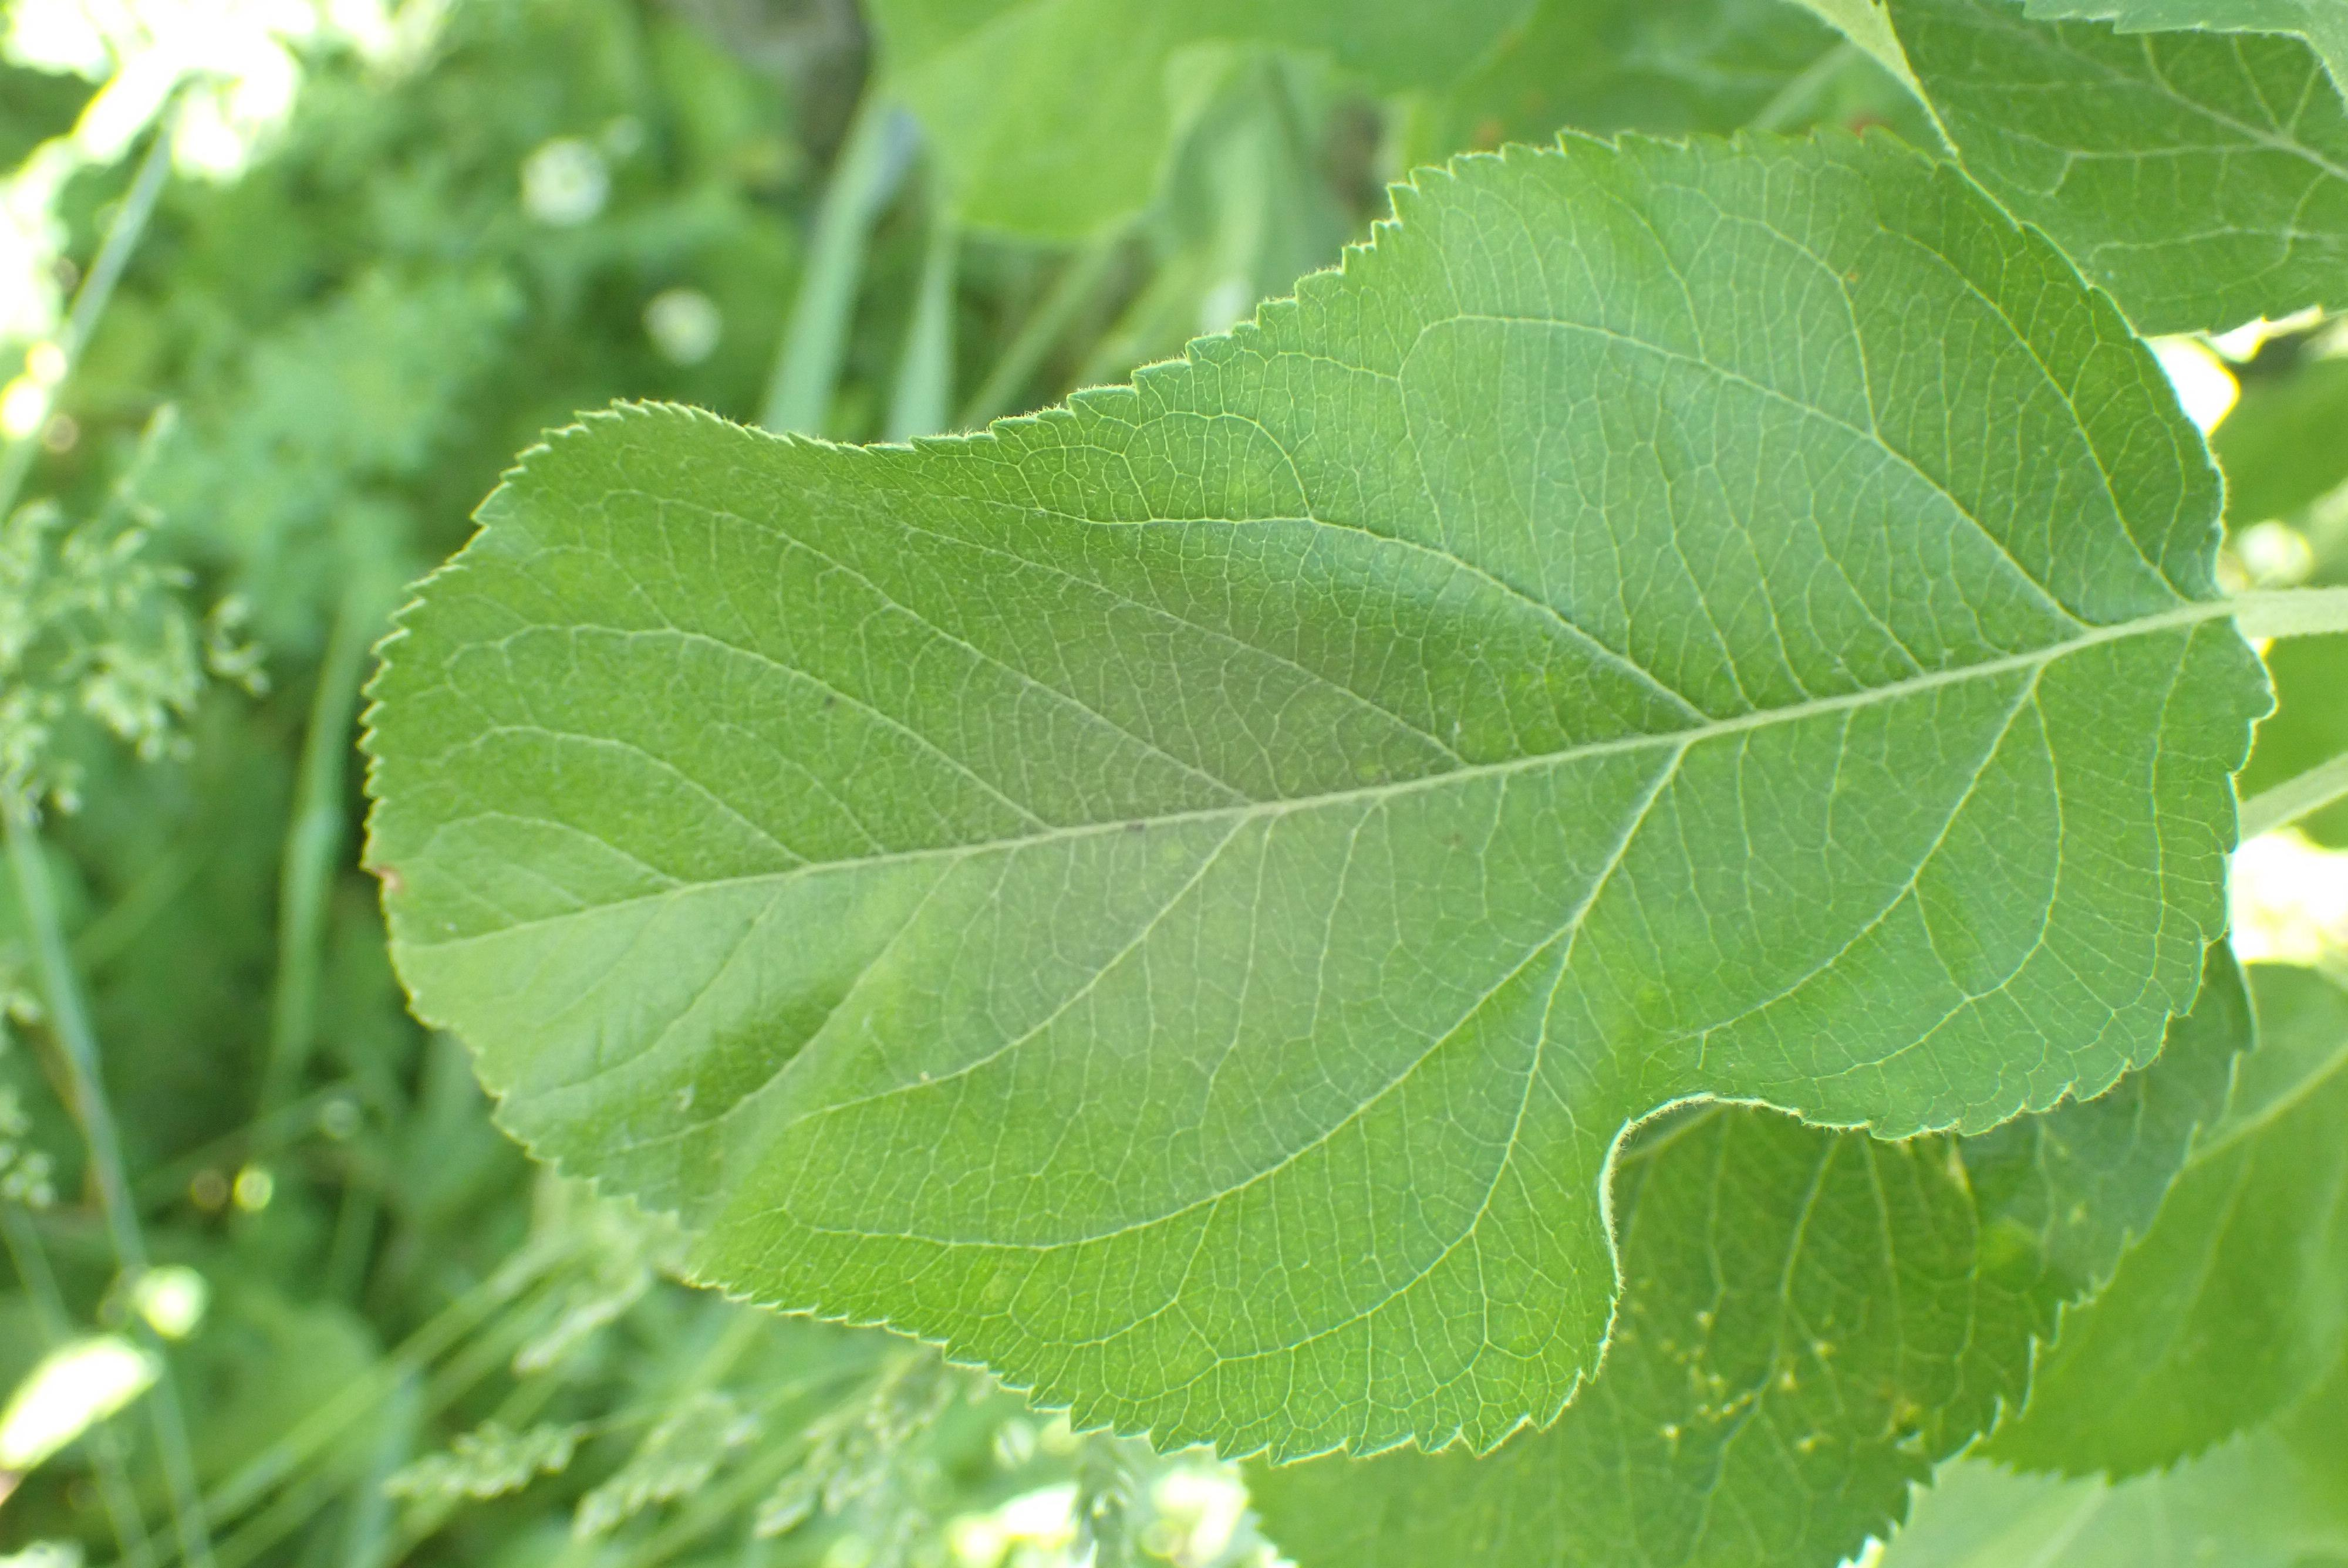

In [51]:
from PIL import Image
import IPython.display as display

image_path = r'D:\machine_learning\plant_dataset\Train\Train\Healthy\8bf8dc40ec70a4fa.jpg'
print("\n\nHealthy plant\n\n")
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))



Powdered plant




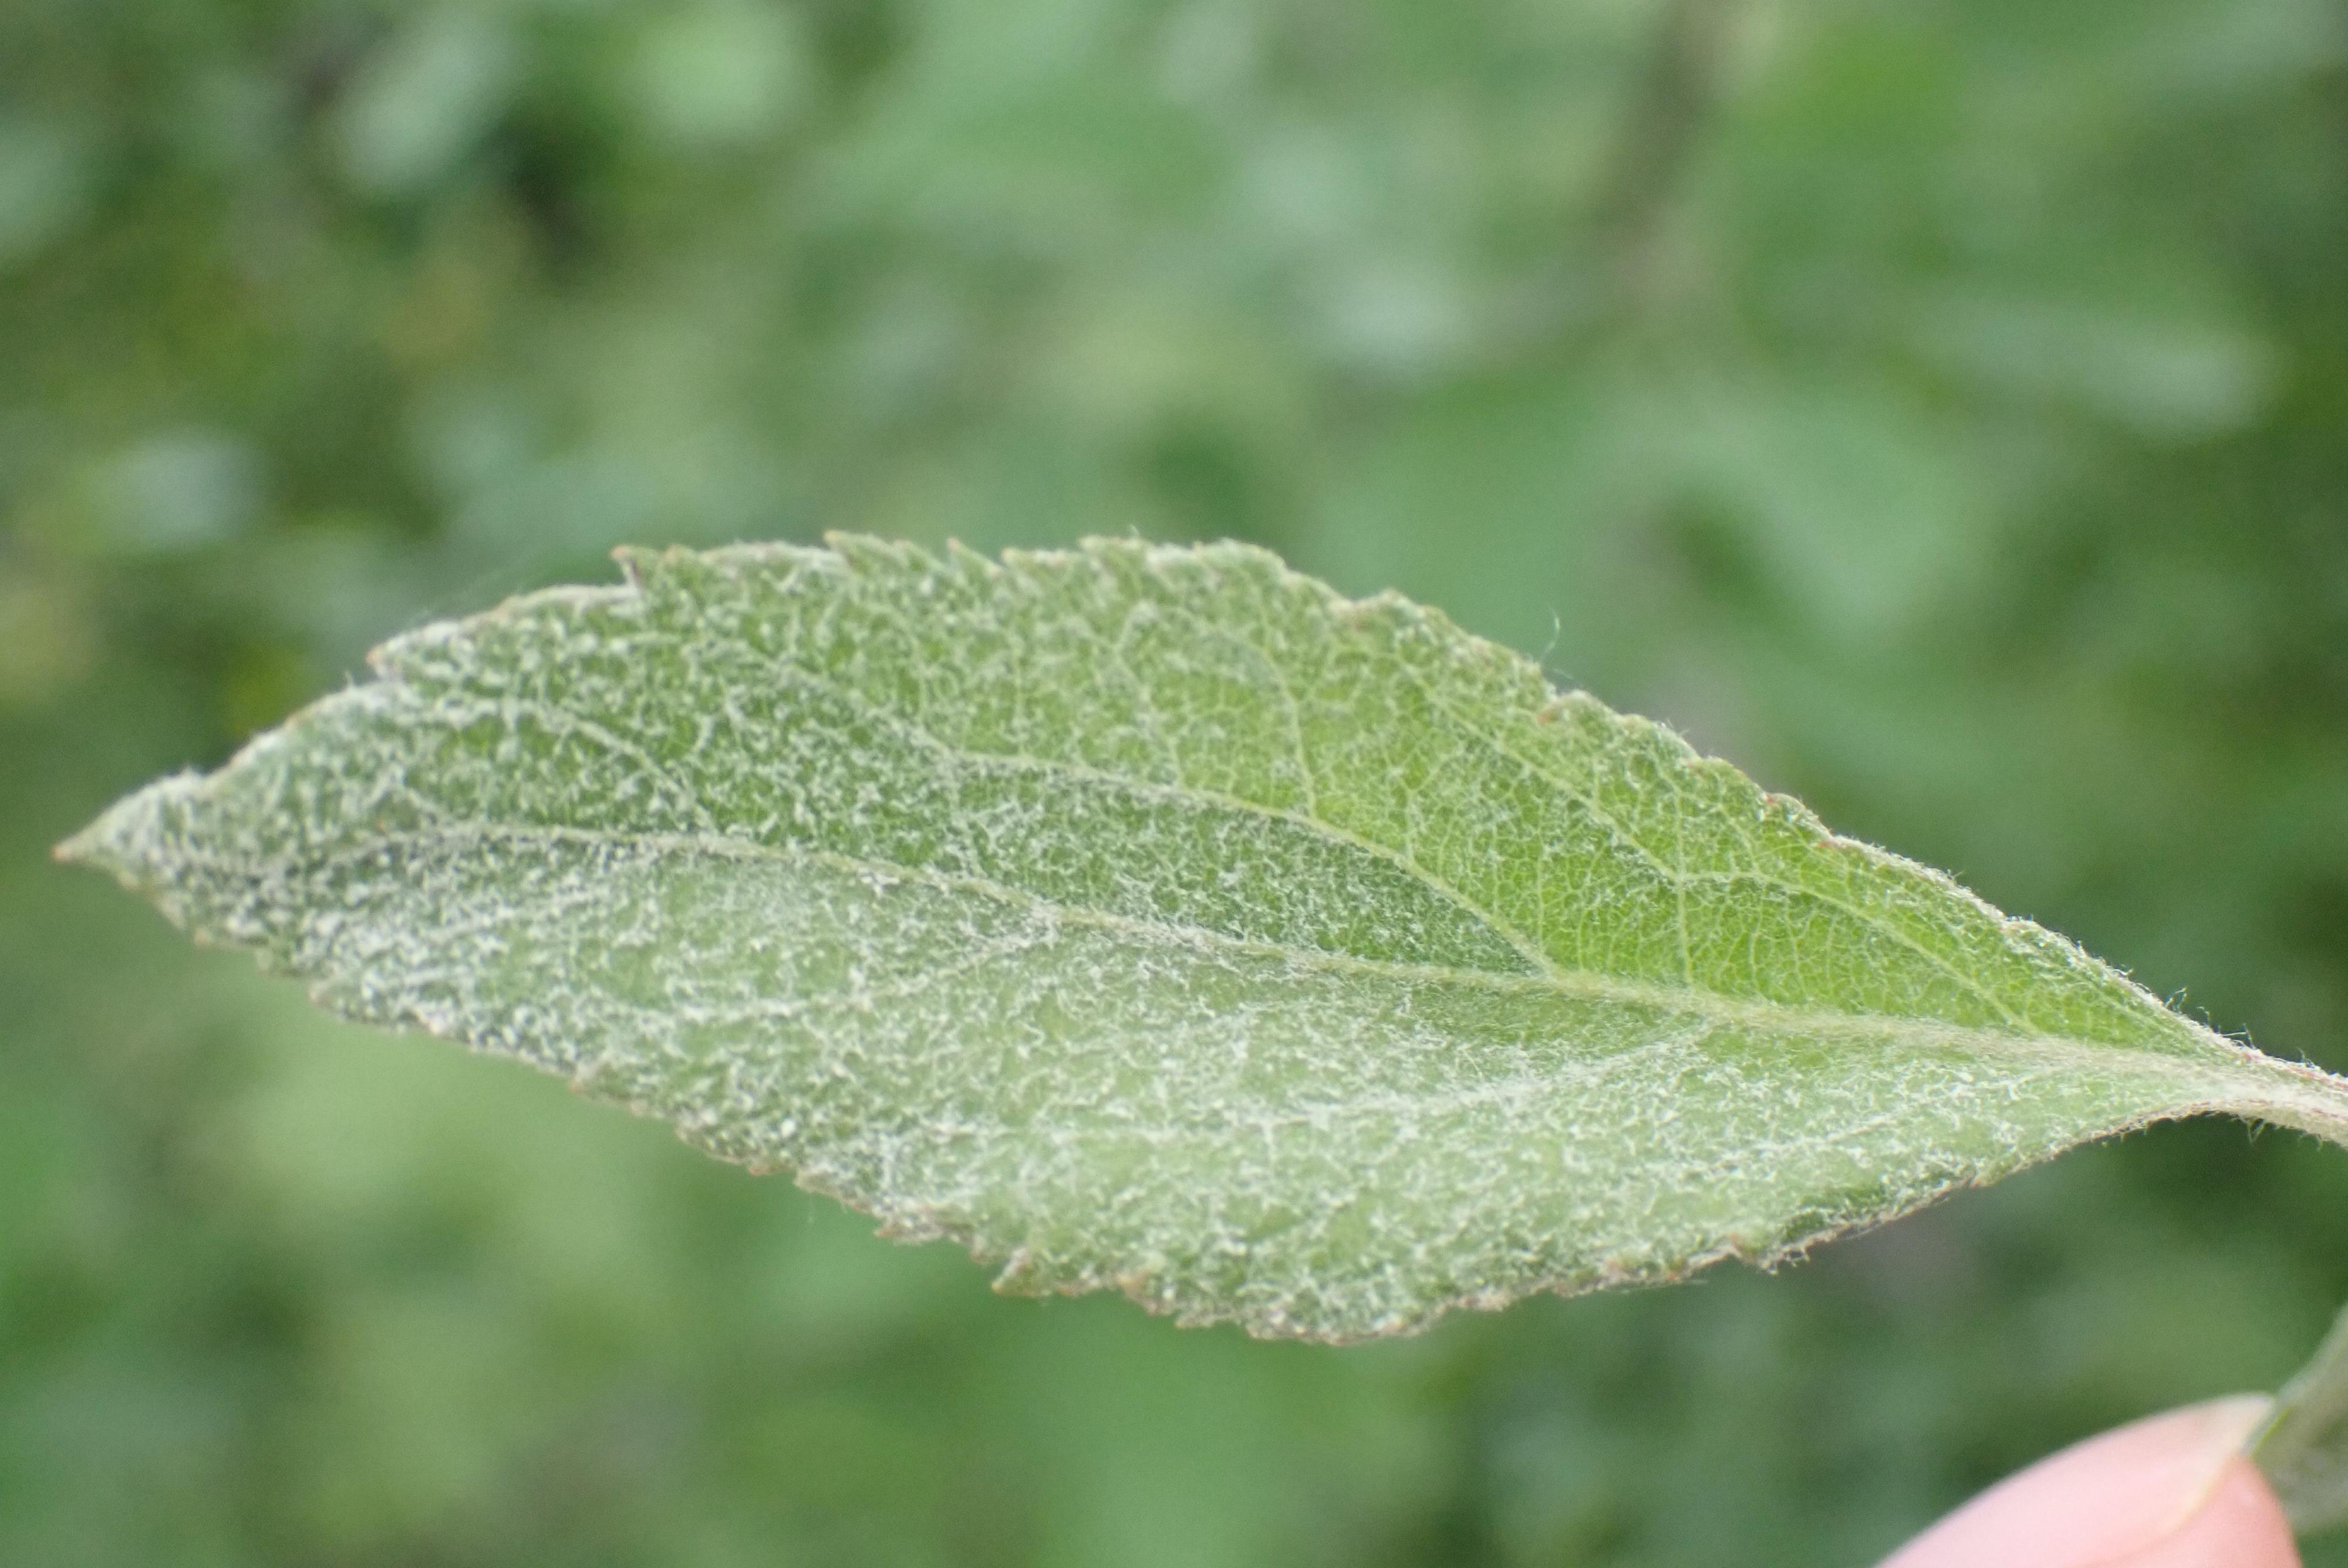

In [53]:
image_path = r"D:\machine_learning\plant_dataset\Train\Train\Powdery\85572bd46852a577.jpg"
print("\n\nPowdered plant\n\n")
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))



Plant Affected by Rust




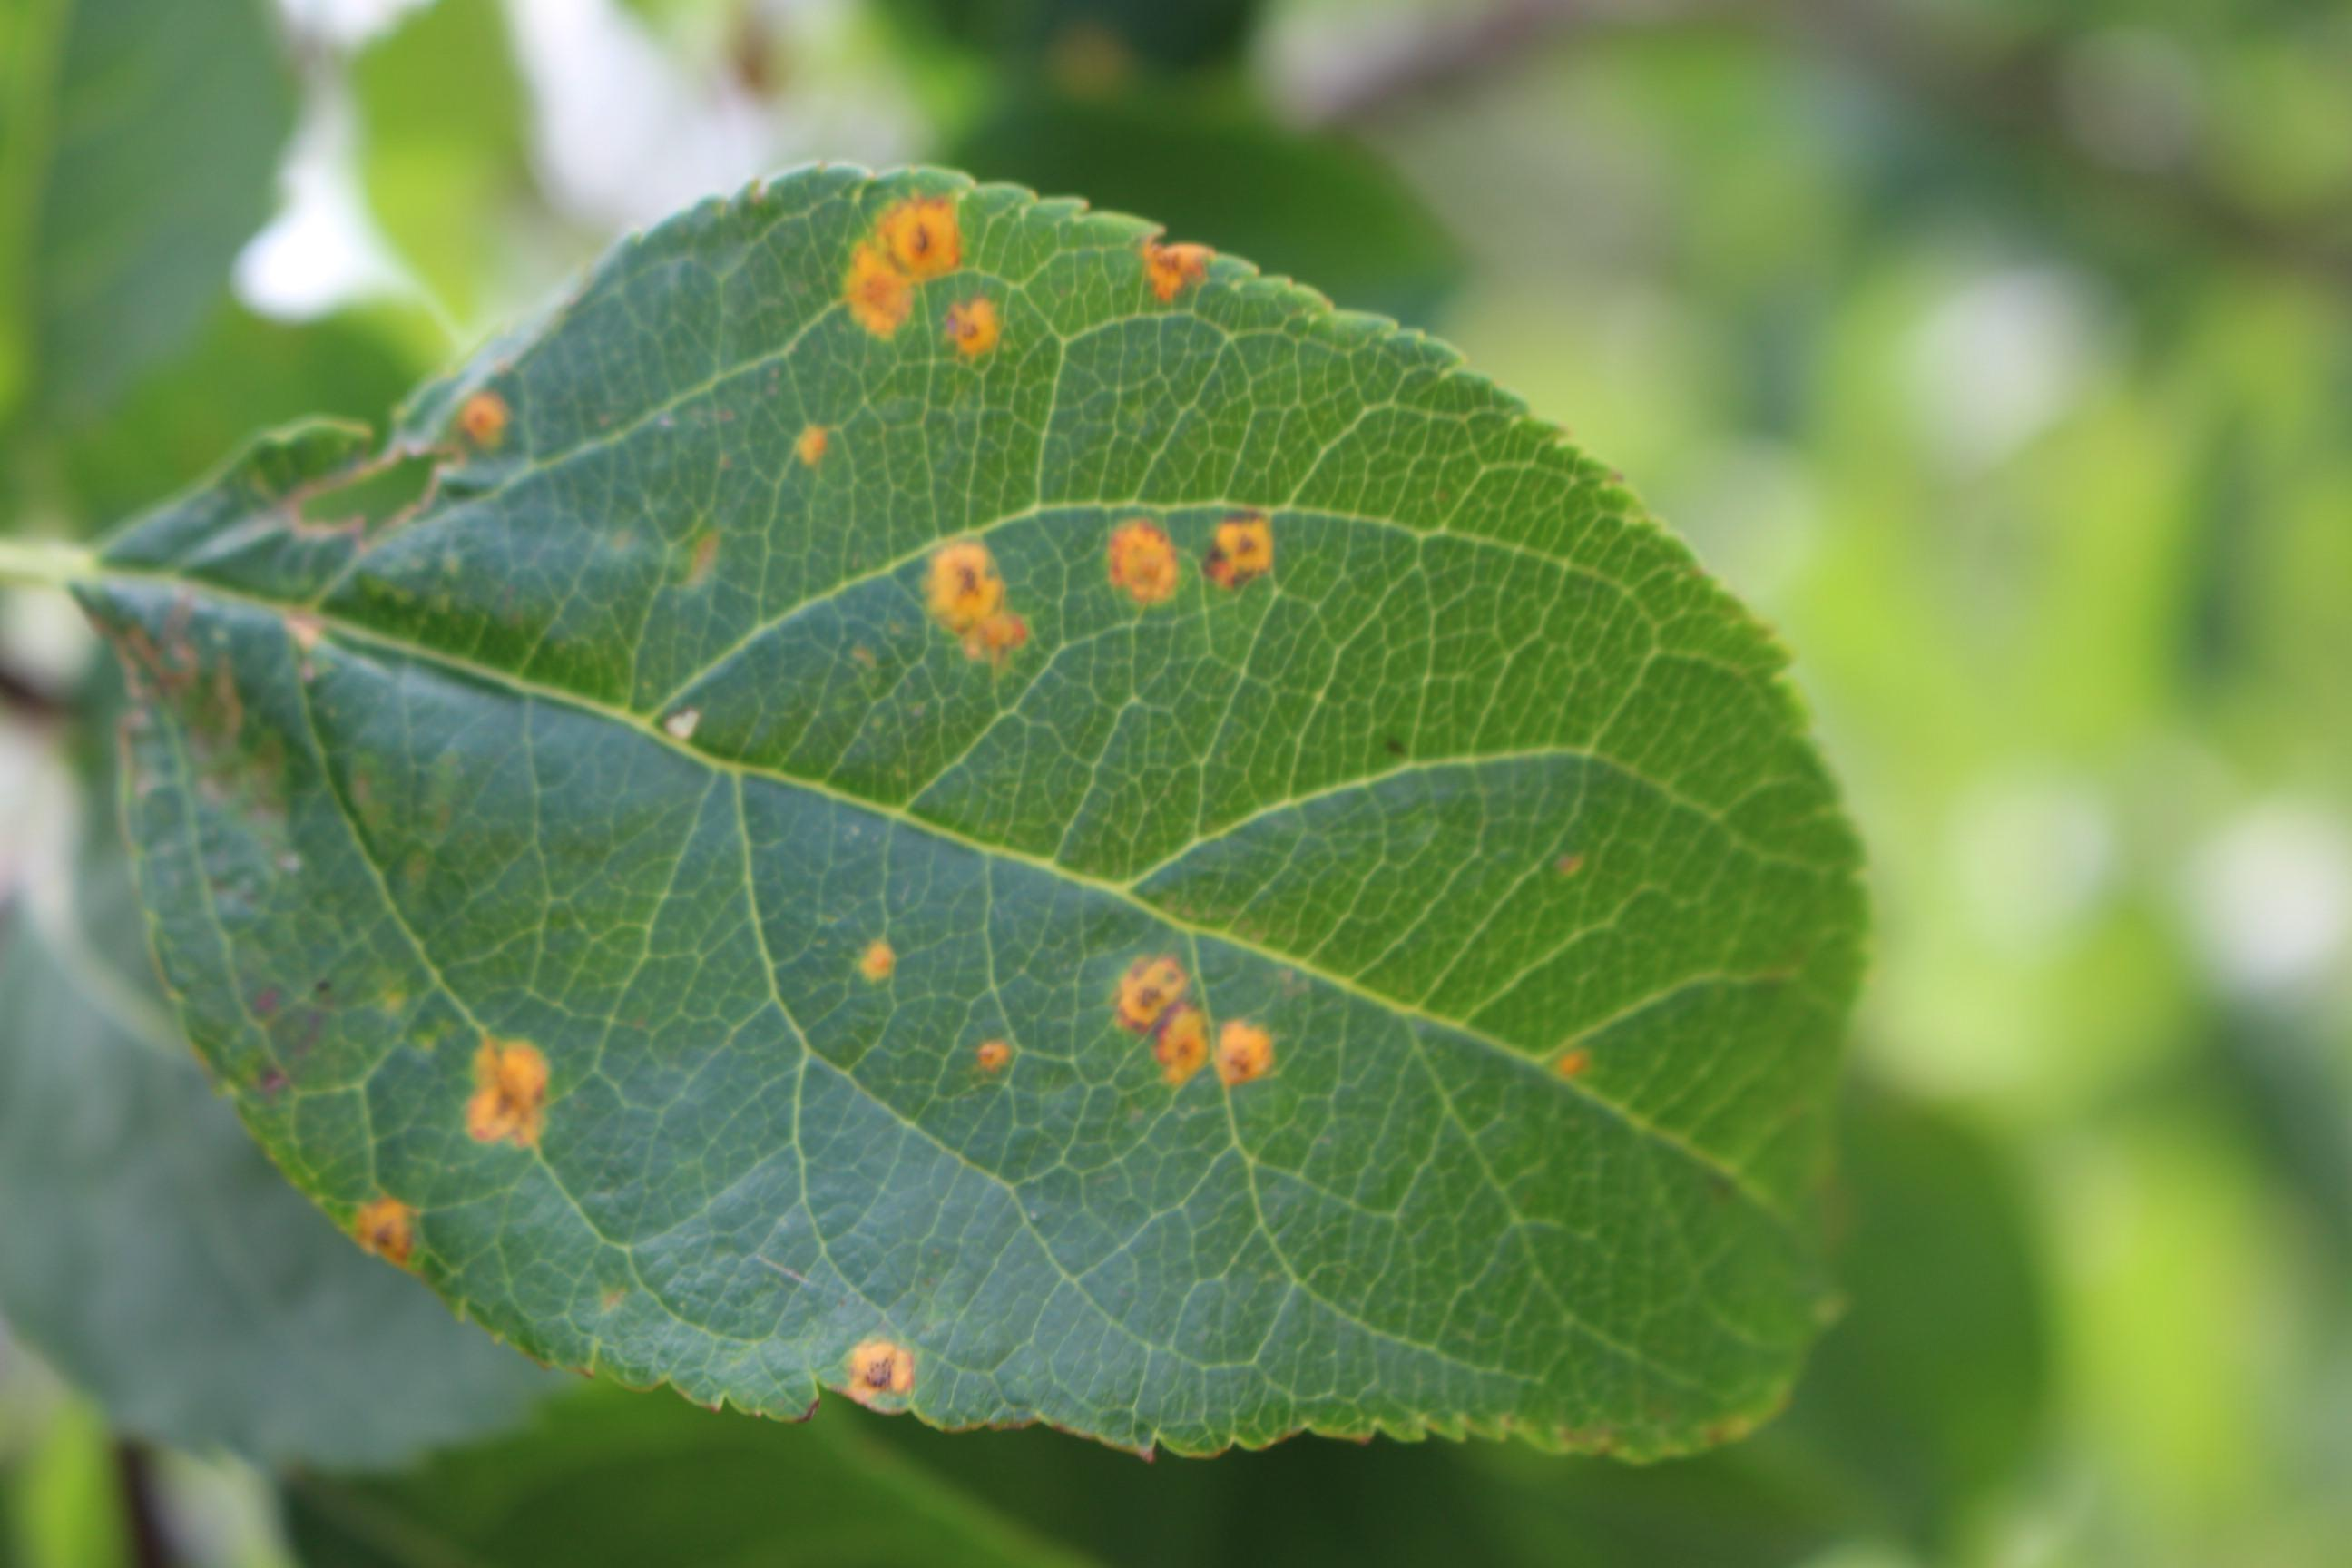

In [54]:
image_path = r"D:\machine_learning\plant_dataset\Train\Train\Rust\a5d042c32bc737ab.jpg"
print("\n\nPlant Affected by Rust\n\n")
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
train_data=train_data_aug.flow_from_directory(train_set,target_size=(150,150), batch_size=32,class_mode='categorical')
val_data=val_data_aug.flow_from_directory(val_set,target_size=(150,150), batch_size=32,class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [9]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\ANCNDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,362,443 (39.53 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,908,296 (26.35 MB)

In [11]:
fitted_model=model.fit(train_data,
                      steps_per_epoch=train_data.batch_size,
                      epochs=20,
                      validation_data=val_data,
                       validation_steps=val_data.batch_size
                      )

Epoch 1/20


C:\ANCNDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.3634 - loss: 1.1124 - val_accuracy: 0.5000 - val_loss: 0.9495
Epoch 2/20


C:\ANCNDA\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.5123 - loss: 0.9624 - val_accuracy: 0.5500 - val_loss: 0.9262
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.6106 - loss: 0.7857 - val_accuracy: 0.7500 - val_loss: 0.6224
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 346ms/step - accuracy: 0.6790 - loss: 0.7363 - val_accuracy: 0.6667 - val_loss: 0.7870
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.6859 - loss: 0.7670 - val_accuracy: 0.7500 - val_loss: 0.5999
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.8258 - loss: 0.4997 - val_accuracy: 0.8167 - val_loss: 0.4602
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8168 - loss: 0.4854 - val_accuracy: 0.8500 - val_loss: 0.4587
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.8770 - loss: 0.3915 - val_accuracy: 0.7833 - val_loss: 0.6030
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.8395 - loss: 0.4723 - val_accuracy: 0.8667 - val_

In [12]:
val_loss,val_accuracy=model.evaluate(val_data,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9125 - loss: 0.2932


In [13]:
print(f'Validation Accuracy: {val_accuracy *100:.2f}%')
print(f'Validation Loss: {val_loss:.4f}%')

Validation Accuracy: 90.00%
Validation Loss: 0.3482%


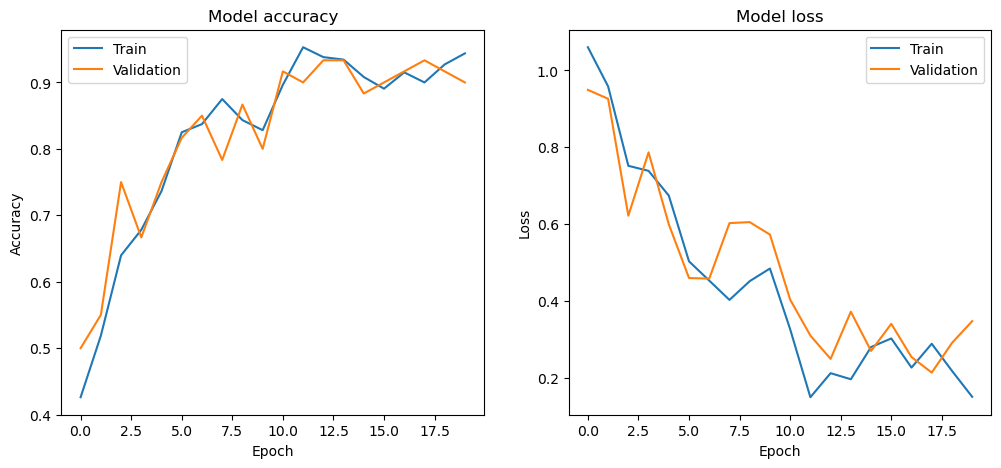

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


In [25]:
y_pred=model.predict(val_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


In [28]:
test_set=r'D:\machine_learning\plant_dataset\Test\Test'
test_data_aug=ImageDataGenerator(rescale=1/255)

test_data=test_data_aug.flow_from_directory(
    test_set,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 150 images belonging to 3 classes.


In [34]:
predictions=model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_actual = test_data.classes
class_names=list(test_data.class_indices.keys())

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_actual, y_pred)
cm


array([[41,  8,  1],
       [ 2, 48,  0],
       [ 1,  0, 49]], dtype=int64)

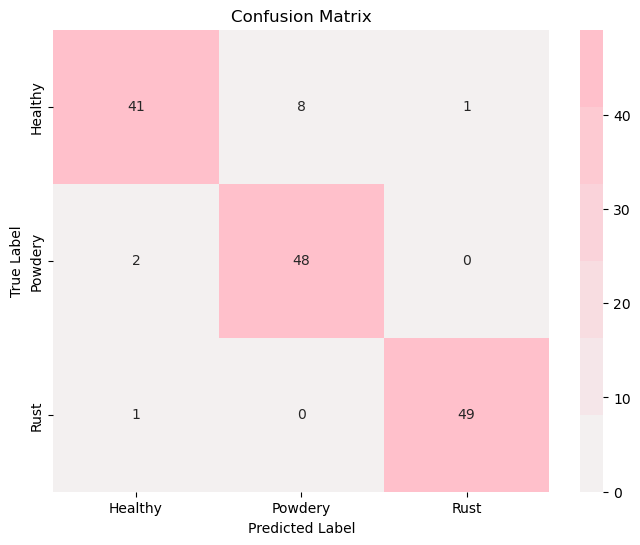

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette('pink'), xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [58]:
model.save('model_plant.keras')